# DS 101 Practical Exam


In this exam, you will be analyzing some 911 call data. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

The aim of the task is to assess your pandas and data visualization skills. You are free to consult internet resources. Please submit your solution to layirowolo@gmail.com before 3pm

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 10 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

** What are the top 10 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

** How many unique title codes are in the 'title' column? **

In [8]:
# i first create a variable to hold the title count 
count = 0 
checked = [] 
  
# loop for counting the unique title  in title 
for i in range(0, len(df['title'])): 
    
    if df['title'][i] not in checked:  
        
        checked.append(df['title'][i]) 
          
        count += 1
print("No.of.unique title code :", count) 
  
print("unique title codes are :", checked)

No.of.unique title code : 110
unique title codes are : ['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY', 'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS', 'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING', 'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE', 'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT', 'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE', 'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR', 'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT', 'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS', 'Fire: FIRE ALARM', 'EMS: CVA/STROKE', 'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN', 'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM', 'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM', 'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL', 'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY', 'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS', 'Fire: TRASH/DUMPSTER FIRE', 'Fire: UNKNOWN TYPE FIRE', 'Fire

In [9]:
n = len(pd.unique(df['title']))
n

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [10]:
#df[df['title']== 'EMS: BACK PAINS/INJURY'].keys
#df['Reason'] = df.apply(lambda x: max(len(x['a']), len(x['b'])), axis=1)
#df['Reason'] = df
#for keyword, word in df['title'].items():
 #   if keyword == 'EMS' or 'Fire' or 'Traffic':
  #      print(word)
#df['Reason']=  df[word]
#df.title.str.split(':|-',expand=True)\
 # .rename(columns=dict(zip(range(3),\
  #['title','Reason'])))
##f1 = df["title"].apply(pd.Series )
df.title.apply(lambda x: pd.Series(str(x).split(":")))
df[['Reason','title']]= df.title.apply(lambda x: pd.Series(str(x).split(":")))


In [11]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


** What is the most common Reason for a 911 call based off of this new column? **

In [12]:
df['Reason'].value_counts()
#df['Reason'].value_counts().max()
#sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]['EmployeeName']

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Use seaborn to create a countplot of 911 calls by Reason. **

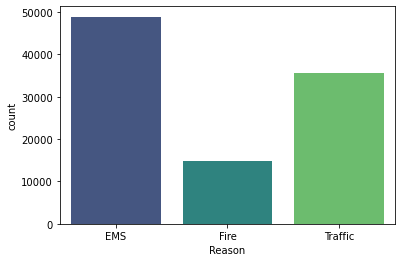

In [13]:
sns.countplot(x='Reason',data=df, palette='viridis')

___
** What is the data type of the objects in the timeStamp column? **

In [14]:
df['timeStamp'].dtypes

dtype('O')

** Convert the Timestamp column from its original data type to DateTime objects. **

In [15]:
#pd.to_datetime(df['timeStamp'], format='%Y/%m/%d') or 
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')
df['timeStamp'].dtypes
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

** You can grab specific attributes from a Datetime object by calling them **

Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


** Your new column Day of Week should be an integer 0-6. Change the integer values to the actual string names of day of the week: **
The dictionary below will guide you.

    {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
Day_of__the_Week = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Day of Week'] = df['Day of Week'].apply(lambda x: Day_of__the_Week[x])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


** Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

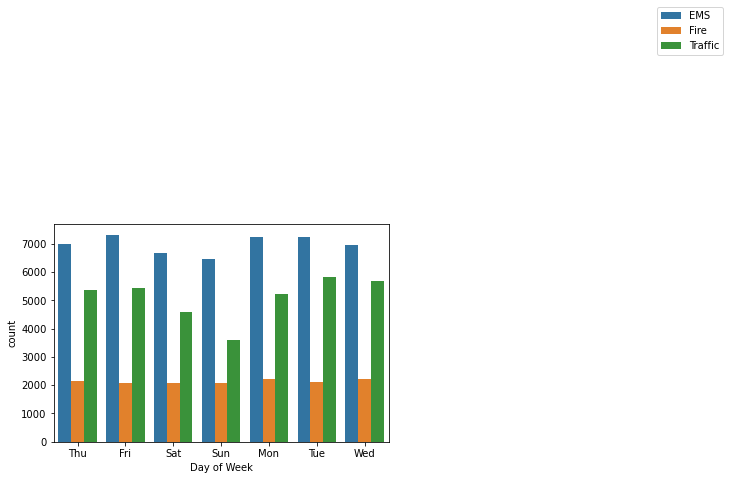

In [19]:
sns.countplot(x='Day of Week',data=df,hue= 'Reason' )
plt.legend(bbox_to_anchor=(2, 2), loc=1, borderaxespad=0.)

**Now do the same for Month:**

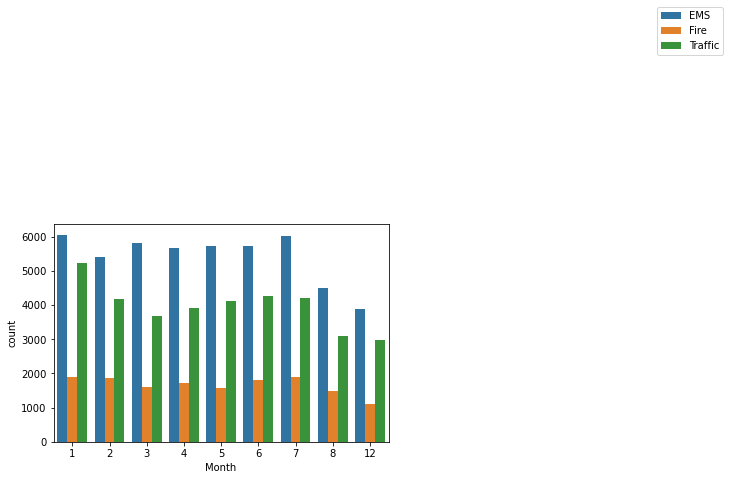

In [20]:
sns.countplot(x='Month',data=df,hue= 'Reason' )
plt.legend(bbox_to_anchor=(2, 2), loc=1, borderaxespad=0.)

**Did you notice something strange about the Plot?**

leave your observation as a comment

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on the returned DataFrame. **

In [21]:
New_Month = df.groupby('Month').count()
New_Month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

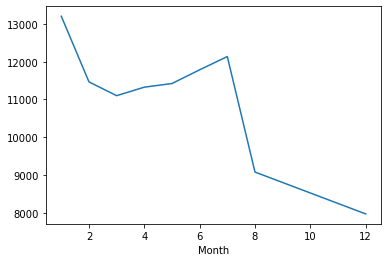

In [22]:
New_Month['title'].plot()

** Use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [23]:
New_Month = New_Month.reset_index()
New_Month.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


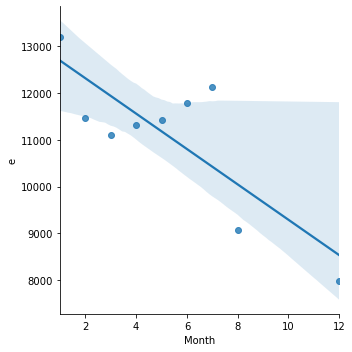

In [24]:
sns.lmplot(x = 'Month', y = 'e', data = New_Month)

** Create a new column called 'Date' that contains the date from the timeStamp column. **

In [25]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

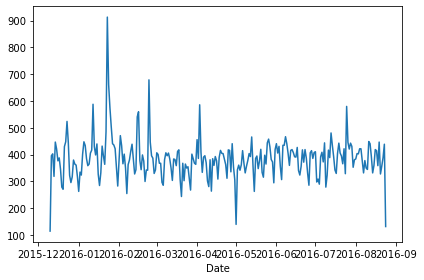

In [26]:
df.groupby('Date').count()['e'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

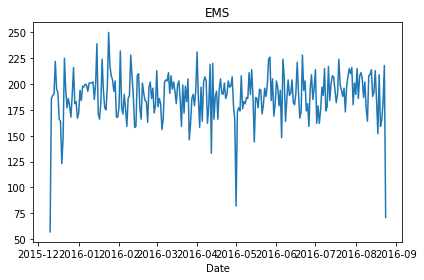

In [28]:
df_traffic = df[df['Reason'] == 'EMS']
df_traffic.groupby('Date').count()['e'].plot()
plt.title('EMS')
plt.tight_layout()

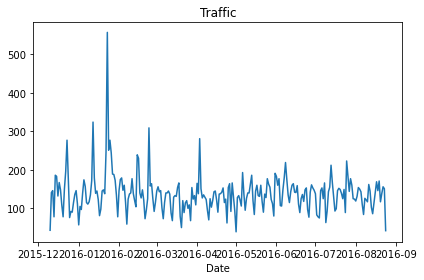

In [29]:
df_traffic = df[df['Reason'] == 'Traffic']
df_traffic.groupby('Date').count()['e'].plot()
plt.title('Traffic')
plt.tight_layout()

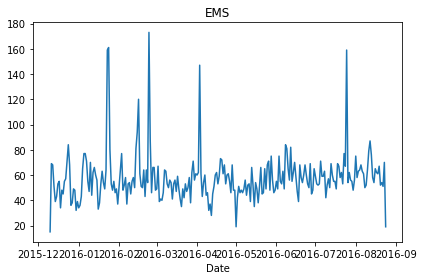

In [30]:
df_traffic = df[df['Reason'] == 'Fire']
df_traffic.groupby('Date').count()['e'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. You can use the link below for some guidance on the unstack method [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)

In [37]:
#s=pd.wide_to_long(df,['Reason'],i='Day of Week',j='Hour',suffix='\\w+',sep='_').unstack(1).stack(0).reset_index()
restruct = df.groupby(['Day of Week','Hour']).count().unstack()['Reason']
restruct.head(2)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325


** Now create a HeatMap using this new DataFrame. **

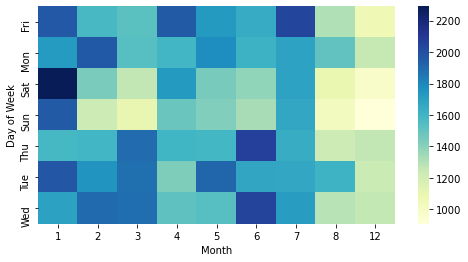

In [50]:
plt.figure(figsize=(8,4))
sns.heatmap(restruct,cmap='YlGnBu')
#sns.heatmap(restruct)

** Now create a clustermap using this DataFrame. **

<Figure size 576x288 with 0 Axes>

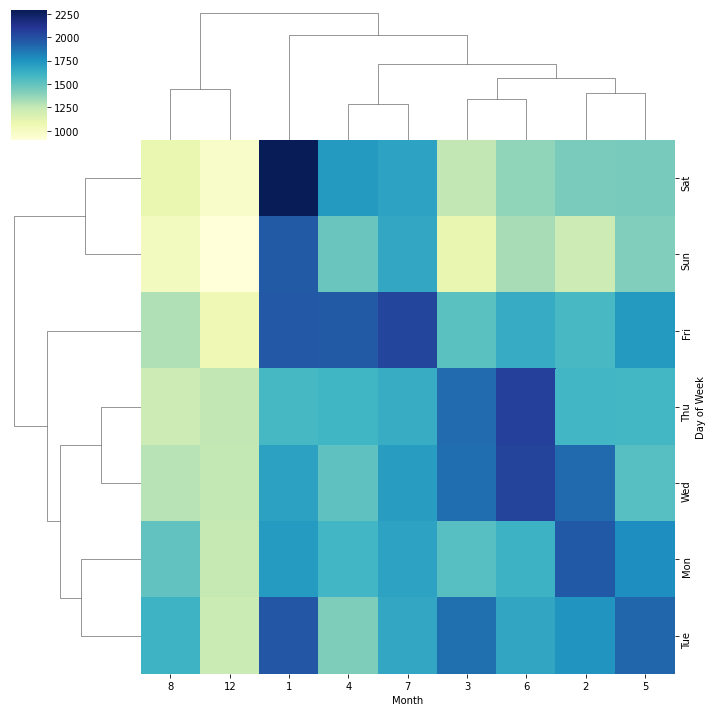

In [49]:
plt.figure(figsize=(8,4))
sns.clustermap(restruct, cmap='YlGnBu')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [44]:
restruct = df.groupby(['Day of Week','Month']).count().unstack()['Reason']
restruct.head(2)

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257


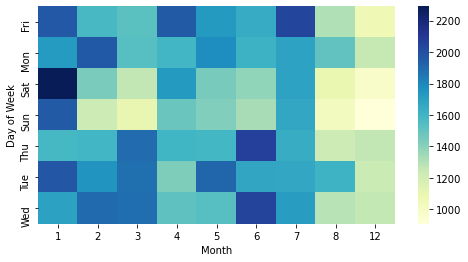

In [47]:
plt.figure(figsize=(8,4))
sns.heatmap(restruct,cmap='YlGnBu')

<Figure size 576x288 with 0 Axes>

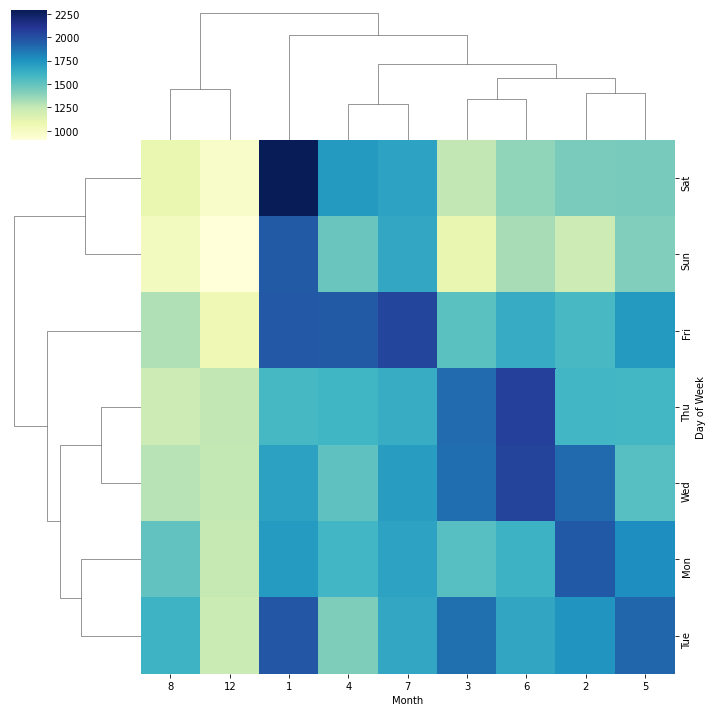

In [48]:
plt.figure(figsize=(8,4))
sns.clustermap(restruct, cmap='YlGnBu')


# End